In [1]:
import cv2
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
from tqdm import tqdm   #进度条
import matplotlib.pyplot as plt

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
train_data_dir = 'data/train'
test_data_dir='data/test/test'

def get_shape(images_dir):
    filenames = os.listdir(images_dir) 
    n = len(filenames)
    i=0
    X = np.zeros((n, 2), dtype=np.int)
    for filename in tqdm(filenames):
        fullname=images_dir+'/'+filename
        img = cv2.imread(fullname) 
        X[i]=img.shape[:2]

        i=i+1

    return X

train_shape=get_shape(train_data_dir)       
test_shape=get_shape(test_data_dir)      

100%|██████████| 12500/12500 [00:39<00:00, 316.73it/s]


In [3]:
df_train_shape = DataFrame(train_shape, columns=["Height","Width"])
display(df_train_shape.describe())
df_test_shape = DataFrame(test_shape, columns=["Height","Width"])
display(df_test_shape.describe())


,Height,Width
count,25000.000000,25000.00000
mean,360.478080,404.09904
std,97.019959,109.03793
min,32.000000,42.00000
25%,301.000000,323.00000
50%,374.000000,447.00000
75%,421.000000,499.00000
max,768.000000,1050.00000


,Height,Width
count,12500.000000,12500.000000
mean,359.930720,404.224480
std,96.757411,109.330874
min,44.000000,37.000000
25%,300.000000,329.000000
50%,374.000000,447.000000
75%,418.000000,499.000000
max,500.000000,500.000000


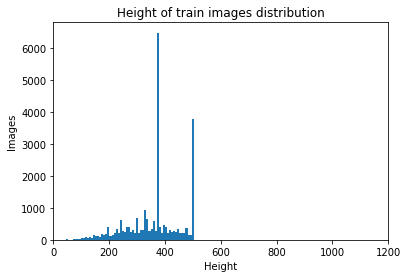

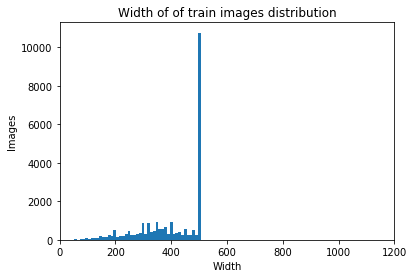

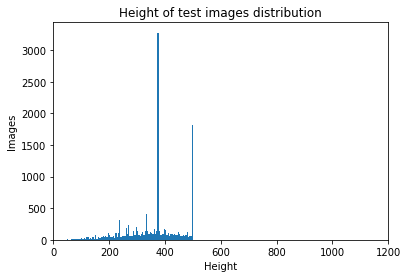

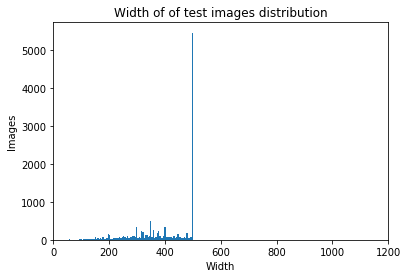

In [4]:
def get_distribution(df, title):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(df["Height"], bins=100)
    plt.title("Height of {} images distribution".format(title))
    plt.xlabel('Height')
    plt.ylabel('Images')
    plt.xlim(0, 1200)
    plt.savefig("{}_height.jpg".format(title))
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.hist(df["Width"], bins=100)
    plt.title("Width of of {} images distribution".format(title))
    plt.xlabel('Width')
    plt.ylabel('Images')
    plt.xlim(0, 1200)
    plt.savefig("{}_width.jpg".format(title))
    plt.show()

get_distribution(df_train_shape, 'train')
get_distribution(df_test_shape, 'test')            